In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [18]:
historical_data = yf.download('PARA', start="2020-02-03", end="2020-02-10")
historical_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,PARA,PARA,PARA,PARA,PARA
Date,,,,,
2020-02-03,28.436588,29.115694,28.023963,28.995346,11674300
2020-02-04,28.857809,29.098505,28.402206,28.797635,8788700
2020-02-05,29.519722,29.811997,29.064119,29.107100,7413600
2020-02-06,29.743225,29.854978,29.416568,29.777611,6101800
2020-02-07,29.837786,30.310582,29.571302,30.216025,6558200


In [13]:
tickers = ['PARA',
            "WBD",
            "GOTU",
            "IQ",
            "TME",
            "VIPS",
            "BIDU",
            "FTCHQ", 
            "TCBI"
            ]

results = []

for ticker_symbol in tickers:
    historical_data = yf.download(ticker_symbol, start="2020-02-03", end="2020-02-04")
    
    if not historical_data.empty:
        closing_price = historical_data["Close"][ticker_symbol].iloc[0]
        # print()
        # print(closing_price)
        # print()
        
        ticker = yf.Ticker(ticker_symbol)
        info = ticker.info
        shares_outstanding = info.get("sharesOutstanding", None)
        
        print(f"Ticker: {ticker_symbol}")
        print(f"Shares Outstanding: {shares_outstanding}")
        print(f"Closing Price: {closing_price}")
        
        five_percent_shares = shares_outstanding * 0.05

        total_value = int(np.ceil(five_percent_shares * closing_price))
        print(total_value)
            
        results.append({
                "Ticker": ticker_symbol,
                "Shares Outstanding": shares_outstanding,
                "Closing Price (2020-02-03)": closing_price,
                "5% Shares": five_percent_shares,
                "Portfolio Value (5%)": total_value
            })


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker: PARA
Shares Outstanding: 633454976
Closing Price: 28.43659210205078
900665039



[*********************100%***********************]  1 of 1 completed

Ticker: WBD
Shares Outstanding: 2474070016
Closing Price: 29.149999618530273
3605957002



[*********************100%***********************]  1 of 1 completed

Ticker: GOTU
Shares Outstanding: 137702000
Closing Price: 35.04999923706055
241322750



[*********************100%***********************]  1 of 1 completed

Ticker: IQ
Shares Outstanding: 528516000
Closing Price: 23.850000381469727
630255341



[*********************100%***********************]  1 of 1 completed

Ticker: TME
Shares Outstanding: 708443008
Closing Price: 12.714132308959961
450361907



[*********************100%***********************]  1 of 1 completed

Ticker: VIPS
Shares Outstanding: 437081984
Closing Price: 12.583389282226562
274998638



[*********************100%***********************]  1 of 1 completed

Ticker: BIDU
Shares Outstanding: 278228000
Closing Price: 130.49000549316406
1815298663



[*********************100%***********************]  1 of 1 completed

Ticker: FTCHQ
Shares Outstanding: 352608000
Closing Price: 12.09000015258789
213151539


Ticker: TCBI
Shares Outstanding: 45903400
Closing Price: 54.689998626708984
125522845


In [14]:
df = pd.DataFrame(results)
df

,Ticker,Shares Outstanding,Closing Price (2020-02-03),5% Shares,Portfolio Value (5%)
0,PARA,633454976,28.436592,31672748.8,900665039
1,WBD,2474070016,29.150000,123703500.8,3605957002
2,GOTU,137702000,35.049999,6885100.0,241322750
3,IQ,528516000,23.850000,26425800.0,630255341
4,TME,708443008,12.714132,35422150.4,450361907
5,VIPS,437081984,12.583389,21854099.2,274998638
6,BIDU,278228000,130.490005,13911400.0,1815298663
7,FTCHQ,352608000,12.090000,17630400.0,213151539
8,TCBI,45903400,54.689999,2295170.0,125522845


In [15]:
sorted_df = df.sort_values(by="Portfolio Value (5%)", ascending=False)

total_value = sorted_df["Portfolio Value (5%)"].sum()

sorted_df

,Ticker,Shares Outstanding,Closing Price (2020-02-03),5% Shares,Portfolio Value (5%)
1,WBD,2474070016,29.150000,123703500.8,3605957002
6,BIDU,278228000,130.490005,13911400.0,1815298663
0,PARA,633454976,28.436592,31672748.8,900665039
3,IQ,528516000,23.850000,26425800.0,630255341
4,TME,708443008,12.714132,35422150.4,450361907
5,VIPS,437081984,12.583389,21854099.2,274998638
2,GOTU,137702000,35.049999,6885100.0,241322750
7,FTCHQ,352608000,12.090000,17630400.0,213151539
8,TCBI,45903400,54.689999,2295170.0,125522845


In [16]:
weights = df["Portfolio Value (5%)"] / total_value
weights = np.array(weights.to_list())
weights

array([0.10907192, 0.43668692, 0.02922456, 0.07632489, 0.05453952,
       0.03330276, 0.21983545, 0.02581298, 0.01520101])

In [19]:
data = yf.download(tickers, start='2019-06-06', end='2020-06-05')['Close'] # 1 year
data = data[tickers] # sorted in tickers order
daily_returns = data.pct_change().dropna()

[*********************100%***********************]  9 of 9 completed


In [20]:
mean_returns = daily_returns.mean()
cov_returns =  daily_returns.cov()

In [34]:
import numpy as np
import pandas as pd

# === Monte Carlo Simulation Parameters ===
num_trails = 100_000
T = 251  # number of days
#total_value = 8_000_000_000  # example initial value of portfolio
initial_equity_price = total_value

# Portfolio parameters
own_capital = total_value
debt = 7_500_000_000
debt_rate = 0.005
initial_margin = debt
initial_margin_rate = 0.075
trs_notional = initial_margin / initial_margin_rate

# Example of multi-asset inputs
np.random.seed(42)
# mean_returns = np.array([0.0002])  # average daily return
# weights = np.array([1.0])  # single asset
# cov_returns = np.array([[0.0001]])  # variance

# === Monte Carlo Price Simulation ===
meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns).T
portfolio_sims = np.full(shape=(T, num_trails), fill_value=0.0)
initialPortfolio = initial_equity_price

for m in range(num_trails):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_returns)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolio

# === Simulate TRS Margin Calls and Portfolio Dynamics ===
defaults = []
final_pnls = []

for m in range(num_trails):
    price_path = portfolio_sims[:, m]
    own_units = own_capital / price_path[0]  # number of units of portfolio
    trs_units = trs_notional / price_path[0]

    margin_balance = initial_margin
    last_vm_price = price_path[0]
    default_flag = False

    for t in range(1, T):
        price_now = price_path[t]
        price_prev = price_path[t - 1]

        if price_now > price_prev and margin_balance > 0:
            gain = price_now - price_prev
            delta = min(margin_balance, trs_units * gain)
            shares_to_buy = delta / price_now
            own_units += shares_to_buy
            margin_balance -= delta

        elif price_now <= 0.85 * last_vm_price:
            drop = last_vm_price - price_now
            delta = trs_units * drop
            shares_to_sell = delta / price_now

            if own_units * price_now >= delta:
                own_units -= shares_to_sell
                margin_balance += delta
                last_vm_price = price_now
            else:
                default_flag = True
                break

    debt_cost = debt * debt_rate
    final_own_value = own_units * price_path[-1]
    final_trs_pnl = trs_units * (price_path[-1] - price_path[0])
    final_portfolio_value = final_own_value + final_trs_pnl - debt_cost

    defaults.append(default_flag)
    final_pnls.append(final_portfolio_value)

# === Risk Metrics ===
defaults = np.array(defaults)
final_pnls = np.array(final_pnls)

default_prob = np.mean(defaults)
var_5 = np.percentile(final_pnls, 1)
expected_shortfall_5 = final_pnls[final_pnls <= var_5].mean()
conditional_mean_pnl = final_pnls[~defaults].mean()


In [35]:
import pandas as pd

# Формируем DataFrame с результатами
results_df = pd.DataFrame({
    "Metric": [
        "Default Probability",
        "VaR (99%)",
        "Expected Shortfall (99%)",
        "Conditional Mean P&L (Survival)"
    ],
    "Value": [
        f"{default_prob:.2%}",
        f"${var_5:,.0f}",
        f"${expected_shortfall_5:,.0f}",
        f"${conditional_mean_pnl:,.0f}"
    ]
})

# Печатаем красиво
print("=== TRS Monte Carlo Results (Multi-Asset Portfolio) ===")
print(results_df.to_string(index=False))

=== TRS Monte Carlo Results (Multi-Asset Portfolio) ===
                         Metric            Value
            Default Probability           67.77%
                      VaR (99%) $-54,197,720,905
       Expected Shortfall (99%) $-59,435,216,243
Conditional Mean P&L (Survival)  $58,897,357,839


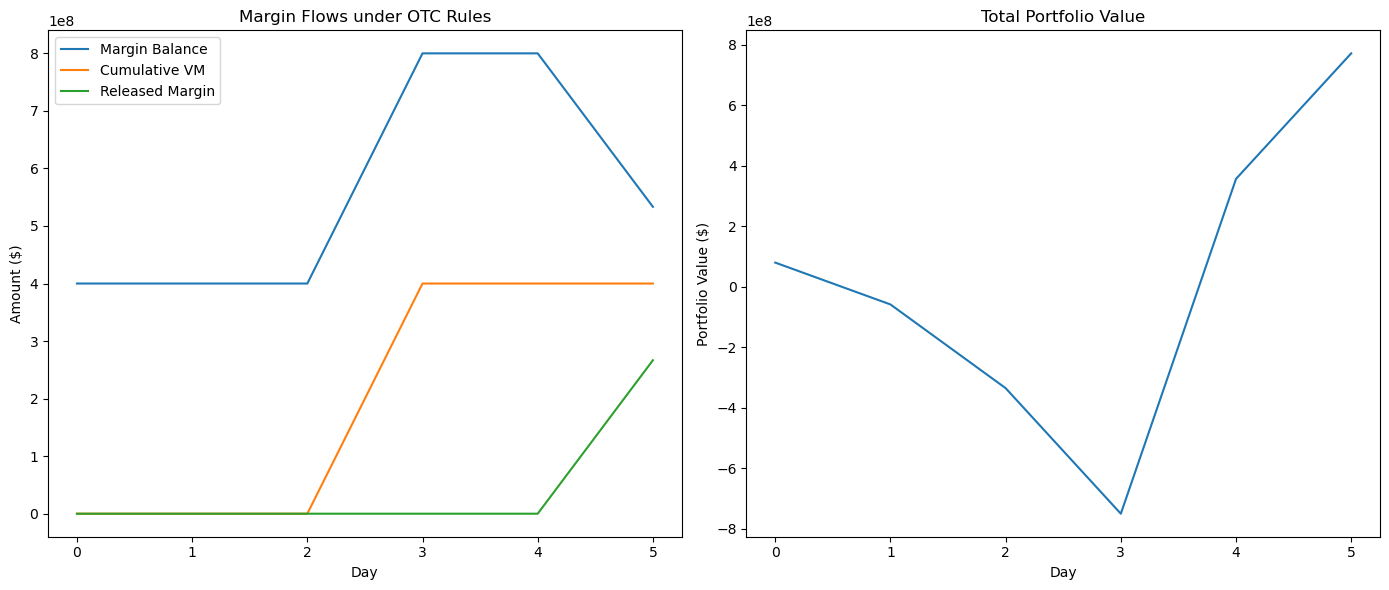

In [ ]:
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.plot(results["Day"], results["Margin Balance"], label="Margin Balance")
# plt.plot(results["Day"], results["Variation Margin (Realistic)"], label="Cumulative VM")
# plt.plot(results["Day"], results["Released Margin"], label="Released Margin")
# plt.title("Margin Flows under OTC Rules")
# plt.xlabel("Day")
# plt.ylabel("Amount ($)")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(results["Day"], results["Total Portfolio Value"])
# plt.title("Total Portfolio Value")
# plt.xlabel("Day")
# plt.ylabel("Portfolio Value ($)")

# plt.tight_layout()
# plt.show()

In [ ]:
# results

,Day,Equity Price,Own Equity Value,TRS PnL,Total Portfolio Value,Variation Margin (Realistic),Released Margin,Margin Balance
0,0,100,100000000.0,0.000000e+00,8.000000e+07,0.0,0.000000e+00,4.000000e+08
1,1,95,95000000.0,-1.333333e+08,-5.833333e+07,0.0,0.000000e+00,4.000000e+08
2,2,85,85000000.0,-4.000000e+08,-3.350000e+08,0.0,0.000000e+00,4.000000e+08
3,3,70,70000000.0,-8.000000e+08,-7.500000e+08,400000000.0,0.000000e+00,8.000000e+08
4,4,110,110000000.0,2.666667e+08,3.566667e+08,400000000.0,0.000000e+00,8.000000e+08
5,5,125,125000000.0,6.666667e+08,7.716667e+08,400000000.0,2.666667e+08,5.333333e+08


Дальше надо:
- вар маржу свободную отправляем на докуп позиций
- стоимость актива растет, когда объем trs растет (какой-то threshold по объему отоносительного всего free-float equity, _по-моему это есть в CS отчете_) Kyle’s Lambda Model и Almgren-Chriss Model (https://chatgpt.com/share/6845fb6c-7f4c-8002-944e-ae0271ec3883)
- 
- 
Как показать 

Total VM paid: 9,000,000 USD
Total VM returned: 8,000,000 USD
Net VM exposure: -1,000,000 USD


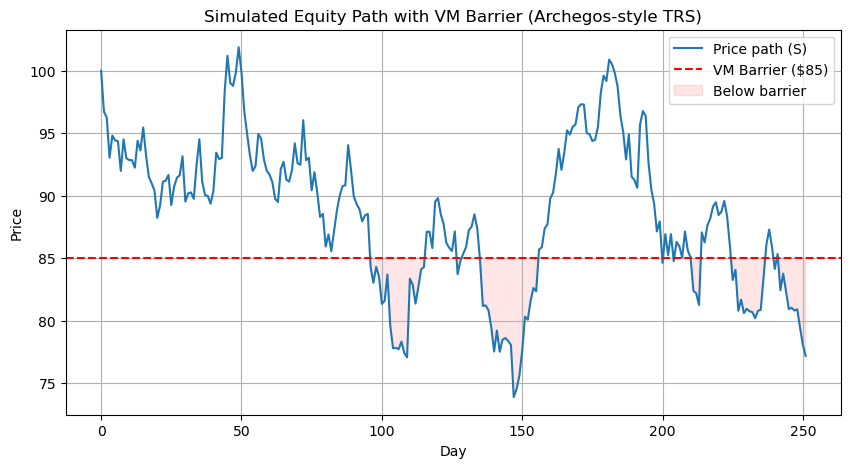

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры TRS и VM
S0 = 100              # начальная цена
BARRIER = 85          # VM-триггер (15% падение)
VM_AMOUNT = 1_000_000 # сумма VM (как у Archegos)
T = 1.0               # срок TRS (в годах)
dt = 1/252            # шаг по времени (дни)
N = int(T / dt)       # количество шагов
mu = 0.00             # ожидаемая доходность
sigma = 0.30          # волатильность акции

# Инициализация траектории
S = np.zeros(N)
S[0] = S0
vm_flow = np.zeros(N)  # поток VM (выплаты или возвраты)
vm_held = 0            # текущая удерживаемая маржа
below = False          # флаг: ниже барьера

# Генерация траектории
#np.random.seed(42)
for t in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

    # VM логика: one-touch вниз
    if not below and S[t] <= BARRIER:
        vm_flow[t] = -VM_AMOUNT
        vm_held = VM_AMOUNT
        below = True

    # VM возврат: one-touch вверх
    if below and S[t] > BARRIER:
        vm_flow[t] = +VM_AMOUNT
        vm_held = 0
        below = False

# Результаты
print(f"Total VM paid: {-np.sum(vm_flow[vm_flow < 0]):,.0f} USD")
print(f"Total VM returned: {np.sum(vm_flow[vm_flow > 0]):,.0f} USD")
print(f"Net VM exposure: {np.sum(vm_flow):,.0f} USD")

# Визуализация
plt.figure(figsize=(10,5))
plt.plot(S, label="Price path (S)")
plt.axhline(BARRIER, color='red', linestyle='--', label='VM Barrier ($85)')
plt.fill_between(range(N), S, BARRIER, where=(S <= BARRIER), color='red', alpha=0.1, label="Below barrier")
plt.title("Simulated Equity Path with VM Barrier (Archegos-style TRS)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

логика с touch option:
возможно стоит добавить логику прям расчета стоимости опциона, как показатель "проваты" расчета через монте-карло